In [41]:
from tpch_polars import run_thread
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import io
import plotly
import time
import plotly.graph_objects as go
from matplotlib.animation import FuncAnimation
from matplotlib import animation
from IPython.display import clear_output

In [66]:
def visualization():
    result = run_thread("q1",1, "../../resources/tpc-h/data/scale=0.05/partition=5")
    dict_new={}
    for record in result:
        buf = io.StringIO(record)
        tmp = pl.read_json(buf)
        df = tmp.to_pandas()
        curFlag = df['l_returnflag'].tolist()
        curLine = df['l_linestatus'].tolist()
        avg_pr = df['avg_price'].tolist()
        ls = len(curFlag)
        df['l_returnflag,l_linestatus'] = "(" +df['l_returnflag']+","+df['l_linestatus'] +")"
        for i in range(ls):
            key = df['l_returnflag,l_linestatus'].tolist()[i]
            val = avg_pr[i]
            if key not in dict_new:
                dict_new[key] = []
                dict_new[key].append(val)
            else:
                dict_new[key].append(val)
        
    dic_key = list(dict_new.keys())
    dic_val = list(dict_new.values())
    avg_len = len(dic_val[0])
#     print(avg_len)    
    plt.ion()
    fig = plt.figure()
    for idx in range(0,avg_len,1):
        new_bar=[]
        for val_ls in dic_val:
            new_bar.append(val_ls[idx])
        clear_output(wait=True)
        plt.bar(dic_key,new_bar)
        plt.xlabel('(l_returnflag,l_linestatus)')
        plt.ylabel('average price')
        plt.show()
        time.sleep(1)
        plt.pause(0.5)

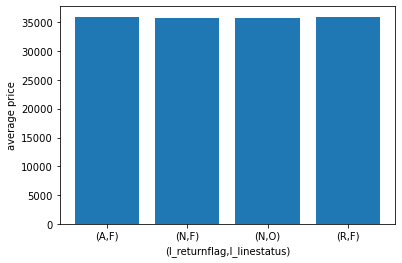

In [67]:
visualization()